In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logger
import plotter

%matplotlib inline

## Plot single training runs

Visualize some runs

In [2]:
# folder where all runs are located
BASE_FOLDER = os.path.join( os.getcwd(), 'results' )

INFO> loaded training data from session [banana_hyper_v1] with timestamp [Thu May  2 00:06:43 2019]
INFO> loaded training data from session [banana_hyper_v3] with timestamp [Thu May  2 00:57:41 2019]
INFO> loaded training data from session [banana_hyper_v4] with timestamp [Thu May  2 11:35:24 2019]
INFO> loaded training data from session [banana_hyper_vtest] with timestamp [Thu May  2 15:38:43 2019]
INFO> loaded training data from session [banana_hyper_vtest] with timestamp [Sat May  4 02:58:29 2019]


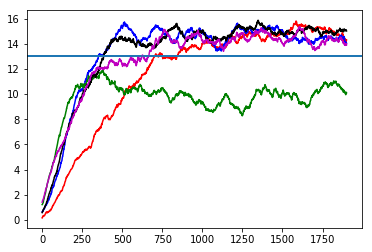

In [8]:
def plotSingleRun( sessionId, color = 'r' ) :
    _folder = os.path.join( BASE_FOLDER, sessionId )
    _filepath = os.path.join( _folder, sessionId + '_results.pkl' )
    
    _data = logger.loadTrainingResults( _filepath )
    
    _scoresAvg = _data['scoresAvg']
    _iters = np.arange( len( _scoresAvg ) )
    
    plt.plot( _iters, _scoresAvg, color = color )
    plt.axhline( 13., xmin = 0, xmax = len( _scoresAvg ) )
    
plotSingleRun( 'banana_hyper_v1', color = 'r' )
plotSingleRun( 'banana_hyper_v3', color = 'b' )
plotSingleRun( 'banana_hyper_v4', color = 'g' )
plotSingleRun( 'banana_hyper_v5', color = 'k' )
plotSingleRun( 'banana_hyper_vtest', color = 'm' )

## Pytorch results over various seeds

First use the training results from the runs using pytorch as library, and over 21 random seeds.

In [ ]:
# folder where all runs are located
_baseFolder = os.path.join( os.getcwd(), 'results' )
# base name for all runs using pytorch
_baseName = 'banana_simple_pth'
# seeds used
_seeds = np.arange( 21 )

# load all training runs
_runs = { 'scoresAll' : [], 
          'scoresAvg' : [],
          'losses' : [],
          'bellmanErrors' : [] }
for seed in _seeds :
    _resultsFolderName = _baseName + '_' + str( seed )
    _resultsFolderPath = os.path.join( _baseFolder, _resultsFolderName )
    
    _resultsFileName = ''
    _partialFileName = _baseName + '_' + str( seed ) + '_results'
    _candidates = os.listdir( _resultsFolderPath )
    for candidate in _candidates :
        if _partialFileName in candidate :
            _resultsFileName = candidate
    
    if _resultsFileName == '' :
        continue
    
    _filepath = os.path.join( _resultsFolderPath, _resultsFileName )
    _runData = logger.loadTrainingResults( _filepath )
    
    _runs['scoresAll'].append( _runData['scoresAll'] )
    _runs['scoresAvg'].append( _runData['scoresAvg'] )
    _runs['losses'].append( _runData['losses'] )
    _runs['bellmanErrors'].append( _runData['bellmanErrors'] )

print( 'len(runs[scoresAll]) : ', len( _runs['scoresAll'] ) )
print( 'len(runs[scoresAll][0]) : ', len( _runs['scoresAll'][0] ) )

In [ ]:
axes = plotter.drawStdPlot( _runs['scoresAvg'], 'Scores during training', 'x', 'y' )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )

axes = plotter.drawBatchResults( _runs['scoresAvg'], 'Scores during training', 'x', 'y' )
axes.axhline( y = 13., xmin = 0, xmax = 2000 )

In [ ]:
_runScoresAvg = np.array( _runs['scoresAvg'] )

In [ ]:
_mean = _runScoresAvg.mean( axis = 0 )
_std = _runScoresAvg.std( axis = 0 )

print( 'mean: ', _mean )
print( 'std: ', _std )

In [ ]:
fig, ax = plt.subplots()
ax.plot( np.arange( len( _mean ) ), _mean, 'r-' )
ax.fill_between( np.arange( len( _mean ) ), _mean - 2. * _std, _mean + 2. * _std )

In [ ]:
?ax.fill_between

In [ ]:
( _runs['bellmanErrors'][0][0].shape )